# Histograms

In [67]:
# A toy categorical data set
jobs <- read.csv("jobs.csv")
head(jobs)

   species  department
1 capybara  accounting
2 capybara aeronautics
3     duck  accounting
4  penguin   gardening
5     duck  accounting
6    moose aeronautics

In [68]:
library(ggplot2)
g <- ggplot(jobs, aes(species))
g

ERROR: Error: No layers in plot


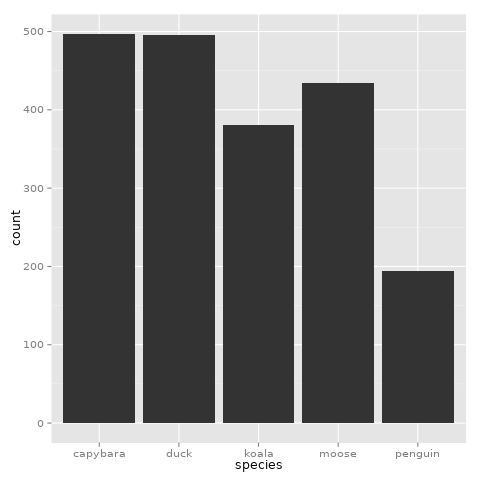

In [69]:
# oops
# nothing to show, because we didn't add a stat or a geom
g + geom_bar()

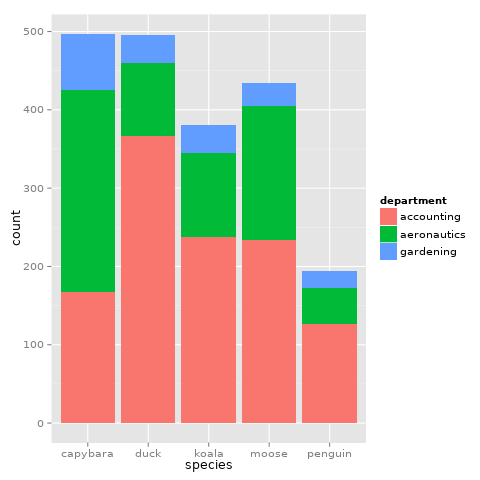

In [70]:
# what if we want to see qsec broken out by department?
g <- ggplot(jobs, aes(species, fill=department))
g + geom_bar()

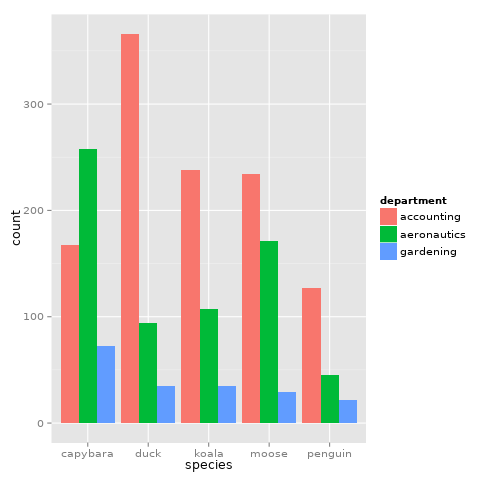

In [71]:
# Instead of stacking factors, we can specify "dodge" positioning

# We can reuse the g variable we defined before

g + geom_bar(position="dodge")

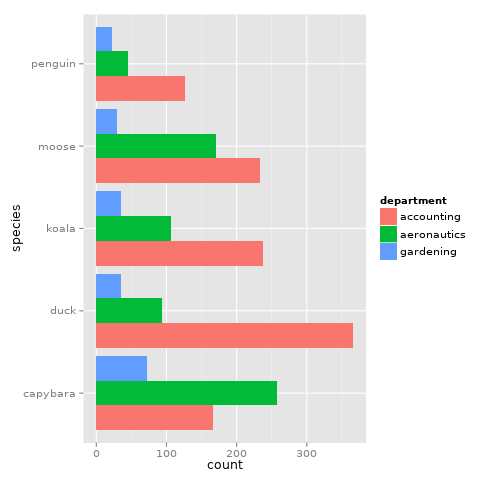

In [72]:
# Coordinate systems are just another mapping

g + geom_bar(position="dodge") + coord_flip()

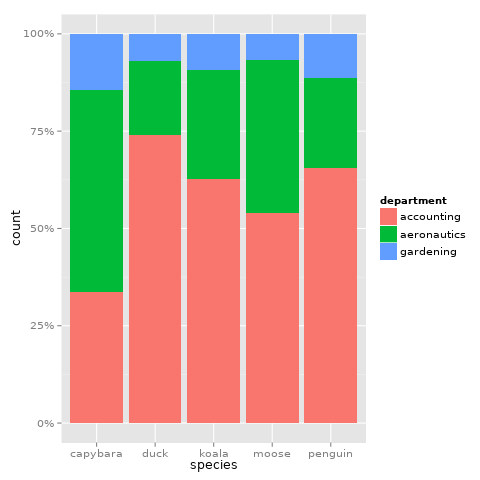

In [73]:
# We might want to see the stacked bars as percents
# Use "fill" positioning

# We can also adjust the y-axis scale to display percents

library(scales)
g + geom_bar(position="fill") + scale_y_continuous(labels=percent_format())

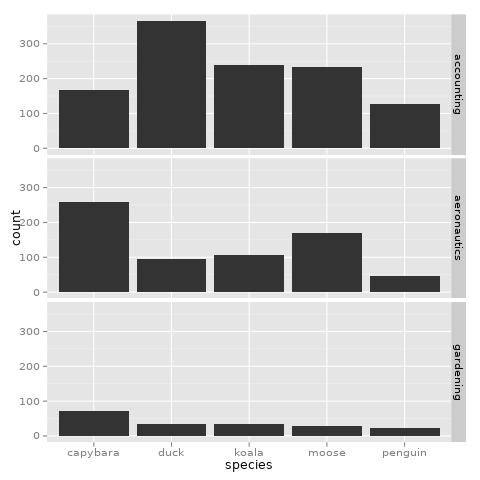

In [74]:
# We can use facets to create multiple plots with the same axes

g <- ggplot(jobs, aes(species))
g + geom_bar() + facet_grid(department ~ .)

# Scatterplots

In [75]:
# use the example iris data set that comes with R

data(iris)
head(iris)

  Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1          5.1         3.5          1.4         0.2  setosa
2          4.9         3.0          1.4         0.2  setosa
3          4.7         3.2          1.3         0.2  setosa
4          4.6         3.1          1.5         0.2  setosa
5          5.0         3.6          1.4         0.2  setosa
6          5.4         3.9          1.7         0.4  setosa

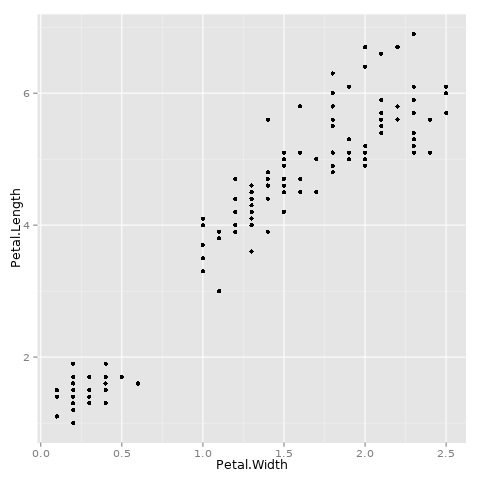

In [76]:
# A basic scatterplot

g <- ggplot(iris, aes(Petal.Width, Petal.Length))
g + geom_point()

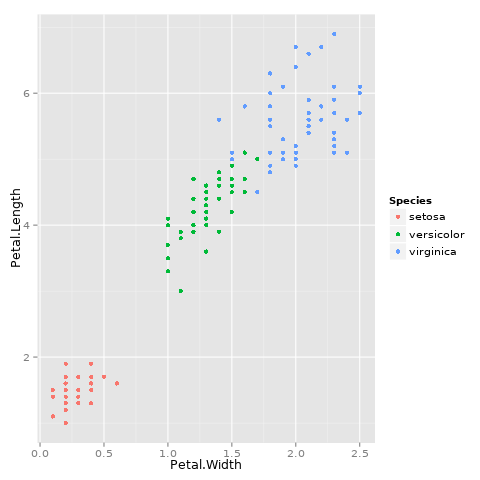

In [77]:
# As before, we can color the geom by Species
# Note that for points, we use the color aesthetic, not the fill aesthetic

g <- ggplot(iris, aes(Petal.Width, Petal.Length, color=Species))
g + geom_point()

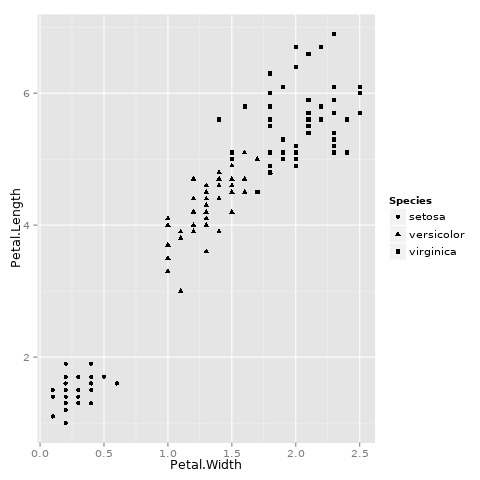

In [78]:
# Alternatively, we can map Species to the shape aesthetic
# This might make more sense for a black-and-white print

g <- ggplot(iris, aes(Petal.Width, Petal.Length, shape=Species))
g + geom_point()

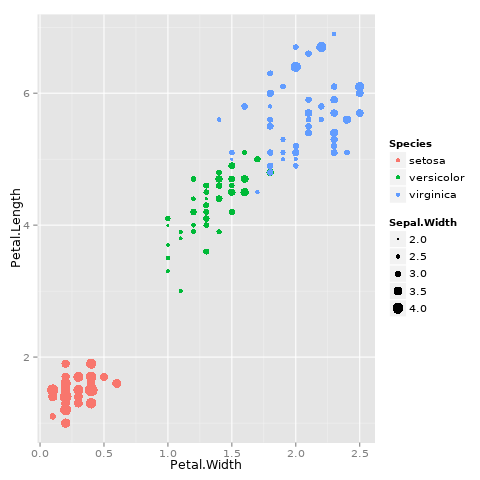

In [79]:
# This isn't very easy to read :(
# We would need to change the default point size

# We can use multiple aesthetics in the same plot

g <- ggplot(iris, aes(Petal.Width, Petal.Length, 
                      color=Species, size=Sepal.Width))
g + geom_point()

In [80]:
# For scatterplots, we often want to measure the relationship
# between the x and y variables

# Perform a linear regression:

lm(Petal.Length ~ Petal.Width, data=iris)


Call:
lm(formula = Petal.Length ~ Petal.Width, data = iris)

Coefficients:
(Intercept)  Petal.Width  
      1.084        2.230  


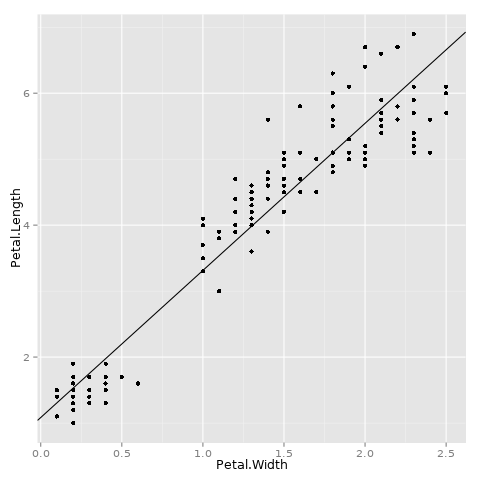

In [81]:
g <- ggplot(iris, aes(Petal.Width, Petal.Length))
g + geom_point() + geom_abline(intercept=1.084, slope=2.230)

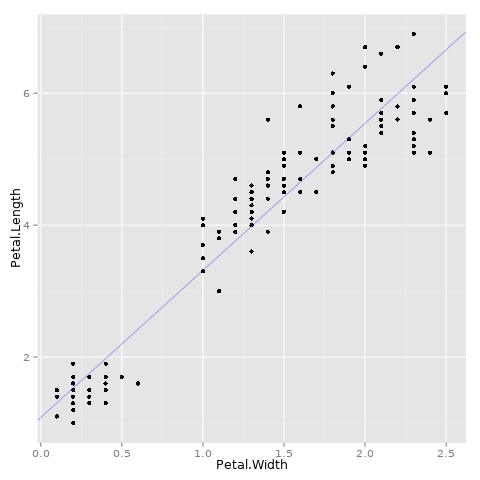

In [82]:
# Personally, I like my regression lines to fade into the background
g <- ggplot(iris, aes(Petal.Width, Petal.Length))
g + geom_point() + 
  geom_abline(intercept=1.084, slope=2.230, color="blue", alpha=0.3)

geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.


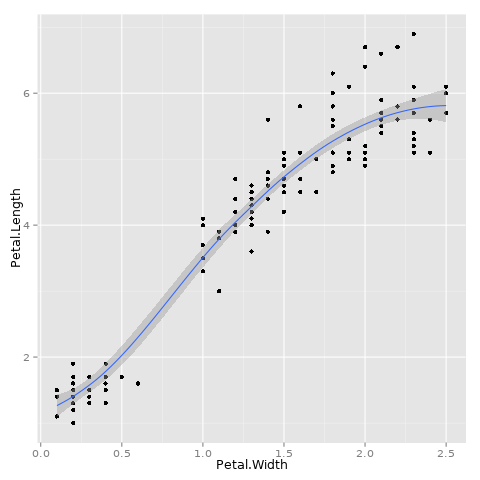

In [83]:
# There is also the "smooth" geom with looks for a trend

g <- ggplot(iris, aes(Petal.Width, Petal.Length))
g + geom_point() + geom_smooth()

geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.


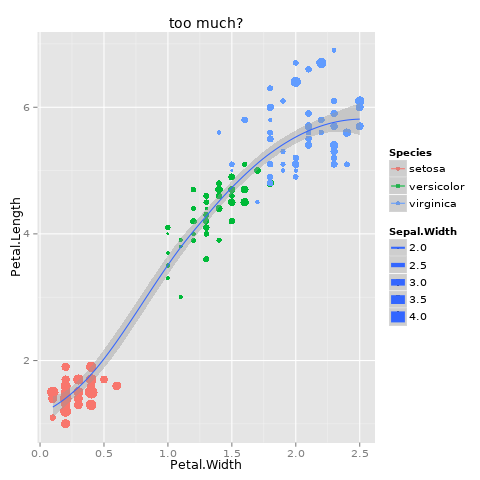

In [84]:
# exercise restraint, it is easy to go overboard

ggplot(iris, aes(Petal.Width, Petal.Length, color=Species, size=Sepal.Width, group=NA)) + 
  geom_point() +
  geom_smooth() +
  labs(title="too much?")

# choropleth plots

In [85]:
# toy data with geo coding

amounts <- read.csv("amounts.csv")
head(amounts)

   fips      amount
1 38089  39361.4608
2 37035  15399.8641
3 18141    466.5579
4 39139   6998.5317
5 17077  46075.6977
6 41051 462510.1057

In [86]:
# We need to map fips codes to lat and long
# I took this map data from an SVG file on wikipedia (creative commons license)

counties <- read.csv("county_map_data.csv")
head(counties)

         x        y group order fips           label
1 62.67874 259.3123     2     1 2185 North Slope, AK
2 63.56074 258.4314     2     2 2185 North Slope, AK
3 64.22074 257.9914     2     3 2185 North Slope, AK
4 64.43975 258.4314     2     4 2185 North Slope, AK
5 64.00074 258.6513     2     5 2185 North Slope, AK
6 64.43975 258.6513     2     6 2185 North Slope, AK

In [87]:
# merge the data using fips codes
# we need to ensure that the polygons are drawn in the correct order

amounts <- merge(amounts, counties)
amounts <- amounts[order(amounts$order),]
head(amounts)

    fips   amount        x        y group order              label
959 2016 702.3759 34.92074 325.4044    40   589 Aleutians West, AK
933 2016 702.3759 34.48074 325.8453    40   590 Aleutians West, AK
950 2016 702.3759 34.25975 325.6234    40   591 Aleutians West, AK
923 2016 702.3759 34.25975 325.4044    40   592 Aleutians West, AK
937 2016 702.3759 34.92074 325.4044    40   593 Aleutians West, AK
938 2016 702.3759 36.02275 328.9293    41   594 Aleutians West, AK

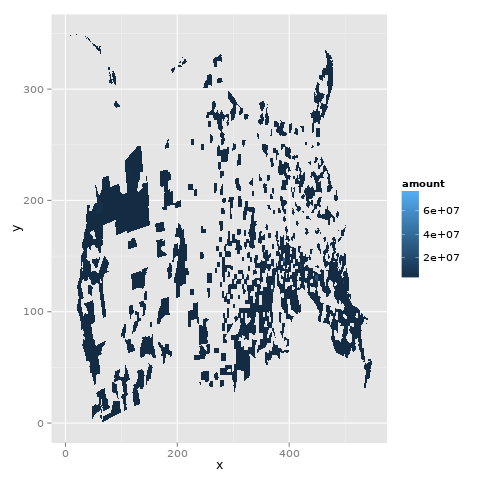

In [88]:
g <- ggplot(amounts, aes(x, y, group=group)) +
       geom_polygon(aes(fill=amount), color=NA)
g

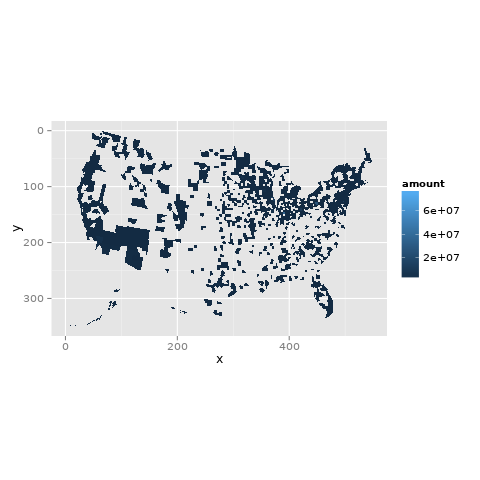

In [89]:
# whoops!
g + coord_fixed() + scale_y_reverse()

In [90]:
# let's try to improve the coloring
# break the payment amounts into buckets

quantile(amounts$amount)

          0%          25%          50%          75%         100% 
3.954070e+00 1.215415e+03 8.837895e+03 6.798570e+04 7.768739e+07 

In [91]:
amounts$spending_level <- cut(amounts$amount, c(1, 100, 1000, 10000, 999999999), 1:4)
head(amounts)

    fips   amount        x        y group order              label
959 2016 702.3759 34.92074 325.4044    40   589 Aleutians West, AK
933 2016 702.3759 34.48074 325.8453    40   590 Aleutians West, AK
950 2016 702.3759 34.25975 325.6234    40   591 Aleutians West, AK
923 2016 702.3759 34.25975 325.4044    40   592 Aleutians West, AK
937 2016 702.3759 34.92074 325.4044    40   593 Aleutians West, AK
938 2016 702.3759 36.02275 328.9293    41   594 Aleutians West, AK
    spending_level
959              2
933              2
950              2
923              2
937              2
938              2

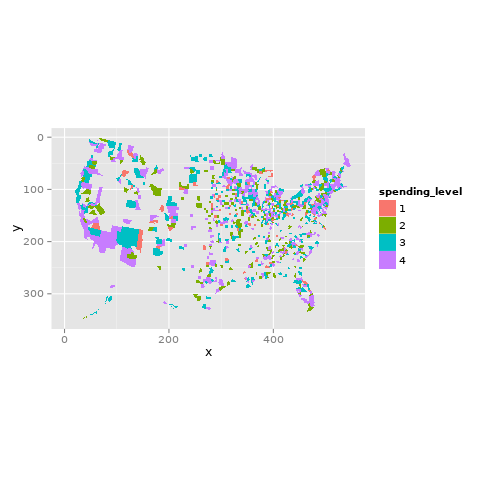

In [92]:
# map the new spending_level variable to fill

g <- ggplot(amounts, aes(x, y, group=group)) +
       geom_polygon(aes(fill=spending_level), color=NA)

g + coord_fixed() + scale_y_reverse()

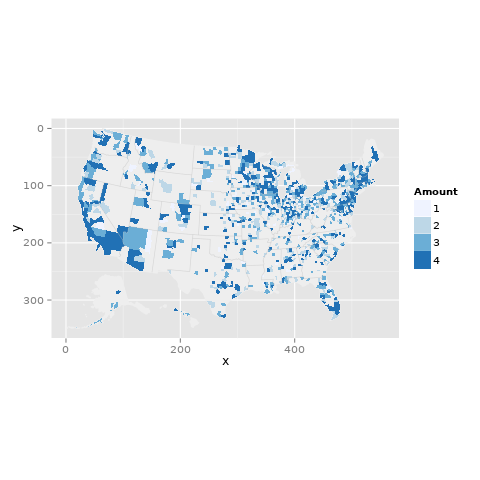

In [93]:
# That's a good start, but it would be better if
#   we filled in the background by shading in all counties
#   we drew state borders
#   we changed the color scale so it's easy to see where there's more spending

states <- read.csv("state_map_data.csv")

g <- ggplot(amounts, aes(x, y, group=group)) +
       geom_polygon(data=counties, color="#eeeeee", fill="#eeeeee") +
       geom_polygon(aes(fill=spending_level), color=NA) +
       geom_path(data=states, color=alpha("gray", 0.5), fill=NA, size=0.3) +
       scale_fill_brewer("Amount") +
       scale_y_reverse() +
       coord_fixed()
       
g

In [ ]:
# Are we getting there?